In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [3]:
df=pd.read_csv('/home/siva/Downloads/archive(6)/dataset2.csv')
df

,Unnamed: 0,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0,7.824944,-0.887890,0.949137,0.867185,0.905457,-0.564753,1.064772,0.871957,0.073367,-0.468684,-1.518201
1,1,-0.284809,0.402109,-0.109812,0.353789,-0.368996,0.484929,-0.872589,-0.305881,-0.284581,0.547374,-0.755235
2,2,-5.551631,-0.114545,-1.603722,0.284455,-0.276847,-1.421414,-1.135600,-0.021529,-0.826239,0.647715,-2.370580
3,3,0.087262,0.832631,0.443724,0.472880,1.260798,0.589971,-0.150165,1.148314,1.034029,-0.205375,-0.488831
4,4,0.169201,0.318175,-0.042458,0.014656,0.323378,0.425665,0.268726,0.177851,-0.128694,0.110501,0.797469
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.284998,0.401581,0.133351,-0.285002,1.348053,-0.386241,-0.390832,-0.631856,-0.240864,-0.064970,-0.617728
996,996,-0.064230,0.859591,0.184304,-0.029521,2.466935,1.239812,-0.038577,0.945754,0.578205,-0.649108,0.420242
997,997,0.852619,0.990358,-0.118427,-0.723684,-0.027019,0.477223,-0.978561,-1.133379,-0.613947,0.279208,1.909412
998,998,16.528922,-0.498523,-2.075085,-1.654938,0.863903,0.903119,-0.733382,0.391713,-0.650520,-1.097475,0.965687


In [4]:
X=df.drop(['y'],axis=1)
y=df['y']

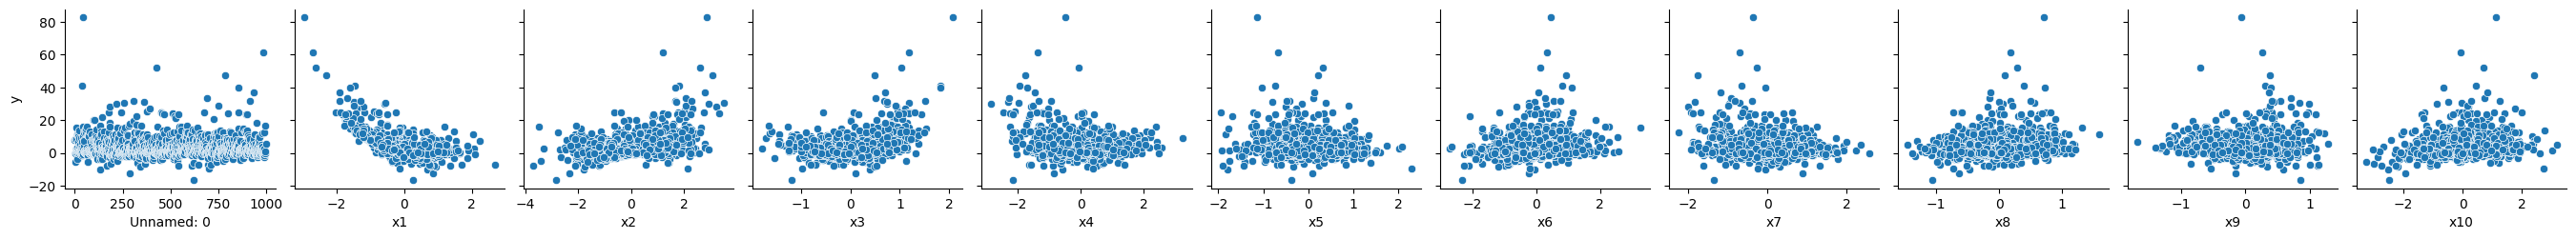

In [5]:
sns.pairplot(data=df,x_vars=df.drop(['y'],axis=1),y_vars=['y'])

In [6]:
poly=PolynomialFeatures(3)
X_poly=poly.fit_transform(X)
model=LinearRegression()
model.fit(X_poly,y)

LinearRegression()

In [7]:
model.score(X_poly,y)

0.9994984603611226

In [8]:
param_grid={
    'polynomial_features__degree':[1,2,3,4,5]
}
polynomial_feature=PolynomialFeatures()
pipeline=Pipeline([
    ('polynomial_features',polynomial_feature),
    ('linear_regression',model)
])
grid_search=GridSearchCV(pipeline,param_grid,cv=5)
grid_search.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'polynomial_features__degree': [1, 2, 3, 4, 5]})

In [9]:
grid_search.best_params_

{'polynomial_features__degree': 3}

In [10]:
grid_search.best_score_

0.9976442356911157